# Final Project - Predicting FIFA 19 Overall Field Player Ratings with Multiple Linear Regression

#### Cray  Bryan

## Dataset Description

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It was released on September 28, 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows. It is the 26th installment in the FIFA series.

The dataset, "Fifa 19 complete player dataset" is from Kaggle: https://www.kaggle.com/karangadiya/fifa19.

I think the dataset is from a credible source for the following reasons:
- The data was scraped directly from an online database of Fifa 19 players (https://sofifa.com/).
- The scraping code is publicly available on github.
- The dataset has over 1300 upvotes on kaggle and over 250 Kernels based on other users' analysis.

Please see the below for Relevant column descriptions:
- Name: Player name (object)
- Age: Player age (int)
- Nationality: Player's nationality (object)
- Club: Player's team (object)
- Value: How much the player is worth in Euros(float) 
- Wage: How much the player gets paid in Euros(float)
- Preferred Foot: Does the player prefer their left or right foot? (object)
- International Reputation (float)
- Weak Foot: How talented the player is with their non-dominant foot (float - scale from 1 to 5)
- Skill Moves: How skillful of a dribbler the player is (float - scale from 1 to 5)
- Body Type (object)
- Position: Player's preferred position (object)
- Height (object)
- Weight: in pounds (int)

The following columns are on a 0-99 scale. 0 is the lowest rating, and 99 is the highest. All of the following columns are floats:
- Overall: The player's overall rating
- Potential
- Crossing
- Finishing
- Heading Accuracy
- Short Passing
- Volleys
- Dribbling
- Curve
- FKAccuracy
- Long Passing
- Ball Control
- Acceleration
- Sprint Speed
- Agility
- Reactions
- Balance
- Shot Power
- Jumping
- Stamina
- Strength
- Long Shots
- Aggression
- Interceptions
- Positioning 
- Vision
- Penalties
- Composure
- Marking
- Standing Tackle
- Sliding Tackle

## Read in and Clean Dataset

### Read in Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

fifa = pd.read_csv("C:/Users/cbryan/OneDrive/Documents/MSIS 2019/MSIS 502/fifa19/data.csv", header=0)
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Data Munging:

In [2]:
# Drop irrelevant columns
drop = ["Unnamed: 0", 'ID', 'Photo', 'Flag', 'Club Logo','Special', 'Work Rate', 'Real Face', 'Jersey Number', 'Joined', "Loaned From", 'Contract Valid Until', 'LS', 'ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB', "GKDiving", "GKHandling","GKKicking", "GKPositioning", "GKReflexes","Release Clause"]
fifa = fifa.drop(columns= drop)

In [3]:
# Remove Spaces from columns
fifa.columns = fifa.columns.str.replace(' ', "")
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,InternationalReputation,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [4]:
# Locate Missing Data
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                       241
Value                        0
Wage                         0
PreferredFoot               48
InternationalReputation     48
WeakFoot                    48
SkillMoves                  48
BodyType                    48
Position                    60
Height                      48
Weight                      48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping 

In [5]:
# Drop Players with no Stats, Set Unknown Clubs and Positions to "Unknown"
fifa = fifa.dropna(subset = ['Curve'])
fifa.Position = fifa.Position.fillna(value = 'Unknown')
fifa.Club = fifa.Club.fillna(value = 'Unknown')
fifa.isnull().sum()

Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                       0
Value                      0
Wage                       0
PreferredFoot              0
InternationalReputation    0
WeakFoot                   0
SkillMoves                 0
BodyType                   0
Position                   0
Height                     0
Weight                     0
Crossing                   0
Finishing                  0
HeadingAccuracy            0
ShortPassing               0
Volleys                    0
Dribbling                  0
Curve                      0
FKAccuracy                 0
LongPassing                0
BallControl                0
Acceleration               0
SprintSpeed                0
Agility                    0
Reactions                  0
Balance                    0
ShotPower                  0
Jumping                    0
Stamina                    0
Strength      

In [6]:
# Clean up weight column
fifa.Weight = fifa.Weight.str.replace('lbs', "")
fifa.Weight = fifa.Weight.astype(int)
fifa = fifa.rename(columns = {"Weight": "Weight_lbs"})
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,PreferredFoot,InternationalReputation,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [7]:
# Clean up Value column
fifa.Value = fifa.Value.str.replace('€', "")

In [8]:
# Since our column has both M's and K's to signify Millions or Thousands, we need to write a function to take care of this.
# Credit to Roshan Sharma for Syntax
def calc_price(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [9]:
# Apply function
fifa.Value = fifa.Value.apply(lambda x: calc_price(x))

In [10]:
fifa = fifa.rename(columns = {"Value": "Value_euro"})

In [11]:
# Clean up Wage Column
fifa.Wage = fifa.Wage.str.replace('€', '')
fifa.Wage = fifa.Wage.str.replace('K',"")
fifa.Wage = fifa.Wage.astype(float)

In [12]:
fifa.Wage = fifa.Wage * 1000
fifa = fifa.rename(columns = {'Wage': "Wage_euro"})

In [13]:
# One hot encode preferred foot column
fifa = pd.get_dummies(fifa, columns=['PreferredFoot'])

In [14]:
# Subset Dataset to remove Goalies
## The reason we are removing Goalies is because they have very different stats than field players. 
## Our model is going to focus on predicting Overall rating for postiion players, not goalies.
fifa = fifa[fifa.Position != 'GK']

In [15]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value_euro,Wage_euro,InternationalReputation,WeakFoot,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,1,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,5.0,4.0,...,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,0,1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,...,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,0,1
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,...,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,0,1
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,4.0,...,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,0,1


In [16]:
fifa.dtypes

Name                        object
Age                          int64
Nationality                 object
Overall                      int64
Potential                    int64
Club                        object
Value_euro                 float64
Wage_euro                  float64
InternationalReputation    float64
WeakFoot                   float64
SkillMoves                 float64
BodyType                    object
Position                    object
Height                      object
Weight_lbs                   int32
Crossing                   float64
Finishing                  float64
HeadingAccuracy            float64
ShortPassing               float64
Volleys                    float64
Dribbling                  float64
Curve                      float64
FKAccuracy                 float64
LongPassing                float64
BallControl                float64
Acceleration               float64
SprintSpeed                float64
Agility                    float64
Reactions           

## Exploratory Data Analysis

### Examine Dataset:

In [17]:
fifa.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
count,16134.000000,16134.000000,16134.000000,1.613400e+04,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,...,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000
mean,25.006942,66.456551,71.509917,2.520346e+06,10122.660221,1.115408,3.004711,2.532168,164.130904,54.186934,...,50.419177,54.815731,55.459712,52.130842,60.345915,51.305070,51.909570,49.626255,0.248234,0.751766
std,4.548132,6.796340,6.077058,5.709948e+06,22575.669099,0.396407,0.636872,0.617861,14.807510,14.134880,...,18.800294,14.679242,12.915172,12.514460,10.149171,17.226643,19.175164,19.174200,0.432001,0.432001
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,110.000000,11.000000,...,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,154.000000,44.000000,...,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000,0.000000,1.000000
50%,25.000000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,2.000000,163.000000,56.000000,...,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,0.000000,1.000000
75%,28.000000,71.000000,75.000000,2.200000e+06,9000.000000,1.000000,3.000000,3.000000,174.000000,65.000000,...,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000,0.000000,1.000000
max,41.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,243.000000,93.000000,...,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,1.000000,1.000000


### Data Visualizations/Insights:

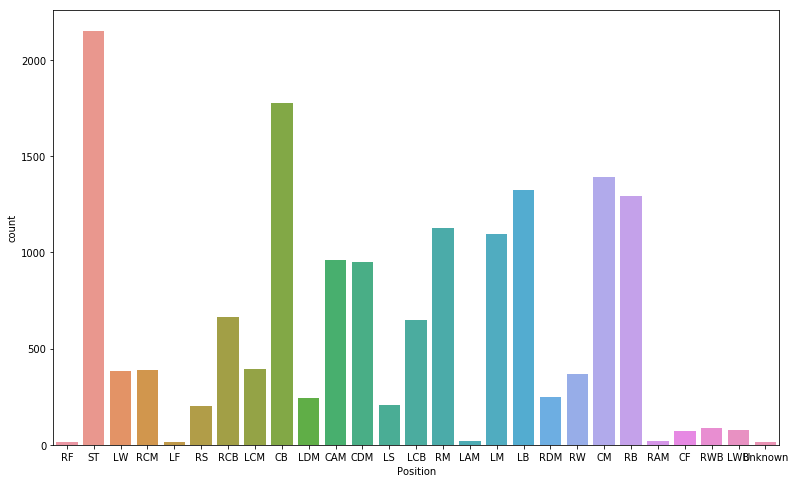

In [18]:
# Examine Player Counts by Position
plt.figure(figsize = (13, 8))
ax = sns.countplot(x="Position", data=fifa) #Striker is the most common field position in Fifa 19

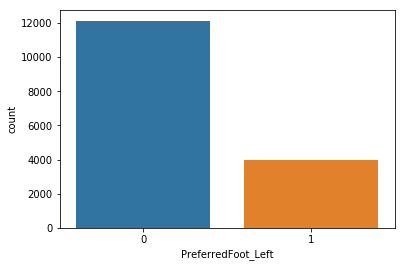

In [19]:
# Examine Player Counts by Preferred Foot
ax = sns.countplot(x="PreferredFoot_Left", data=fifa)

In [20]:
#How do the statistics of players vary by position?
fifa_group = fifa.groupby("Position")
fifa_group.SprintSpeed.mean()
# Right Wingers (RW) have the highest average sprint speed.

Position
CAM        68.849687
CB         58.232846
CDM        61.236287
CF         71.851351
CM         64.676471
LAM        74.047619
LB         71.949319
LCB        59.626543
LCM        66.063291
LDM        63.069959
LF         75.066667
LM         75.818265
LS         72.937198
LW         76.721785
LWB        74.217949
RAM        74.904762
RB         72.565453
RCB        59.125378
RCM        65.670077
RDM        62.895161
RF         73.562500
RM         76.288256
RS         73.325123
RW         77.029730
RWB        73.574713
ST         69.605948
Unknown    65.833333
Name: SprintSpeed, dtype: float64

In [21]:
# Avereage overall rating by position
fifa_group.Overall.mean()
# Left and Right Forwards are the most talented on average.

Position
CAM        66.903967
CB         65.024747
CDM        66.313291
CF         65.824324
CM         63.729555
LAM        71.857143
LB         65.854766
LCB        69.240741
LCM        69.270886
LDM        69.032922
LF         73.866667
LM         66.692237
LS         70.062802
LW         66.616798
LWB        66.512821
RAM        72.285714
RB         66.058869
RCB        69.283988
RCM        69.076726
RDM        69.754032
RF         73.250000
RM         66.496441
RS         69.522167
RW         66.929730
RWB        64.655172
ST         65.535781
Unknown    60.166667
Name: Overall, dtype: float64

In [22]:
fifa_group.Strength.mean()
# Right Center Backs (RCB) and Left Center Backs (LCB) have the highest average strength.

Position
CAM        56.344468
CB         74.352081
CDM        68.354430
CF         57.364865
CM         61.364419
LAM        62.523810
LB         64.318457
LCB        78.098765
LCM        65.850633
LDM        68.222222
LF         62.400000
LM         58.023744
LS         71.879227
LW         56.627297
LWB        64.858974
RAM        54.190476
RB         65.016266
RCB        78.504532
RCM        66.925831
RDM        70.560484
RF         63.375000
RM         57.987544
RS         72.073892
RW         55.797297
RWB        64.275862
ST         69.032528
Unknown    55.250000
Name: Strength, dtype: float64

In [25]:
# Which Country has the best players?
fifa_countries = fifa.groupby("Nationality")
max_countries = fifa_countries.Overall.max()
max_countries
# Portugal and Argentina both have a player with a 94 overall rating, which is the highest in the world.

Nationality
Afghanistan             63
Albania                 81
Algeria                 85
Andorra                 62
Angola                  78
Antigua & Barbuda       69
Argentina               94
Armenia                 83
Australia               76
Austria                 85
Azerbaijan              67
Barbados                66
Belarus                 75
Belgium                 91
Belize                  60
Benin                   75
Bermuda                 70
Bolivia                 74
Bosnia Herzegovina      86
Botswana                56
Brazil                  92
Bulgaria                76
Burkina Faso            78
Burundi                 71
Cameroon                80
Canada                  75
Cape Verde              79
Central African Rep.    82
Chad                    73
Chile                   85
                        ..
Sierra Leone            74
Slovakia                87
Slovenia                83
South Africa            76
South Sudan             60
Spain           

In [26]:
mean_countries = fifa_countries.Overall.mean()
mean_nation = pd.DataFrame(data = mean_countries)

In [27]:
mean_nation.sort_values(by='Overall', ascending = False).head()

,Overall
Nationality,
United Arab Emirates,77.000000
Central African Rep.,73.333333
Israel,72.692308
Dominican Republic,72.000000
São Tomé & Príncipe,72.000000


### Scale Data

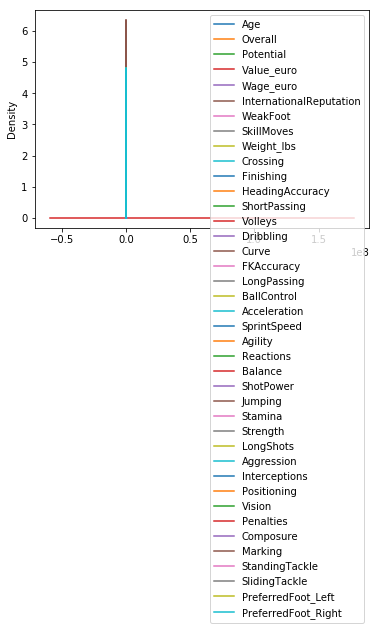

In [463]:
%matplotlib inline
fifa.plot(kind='density')

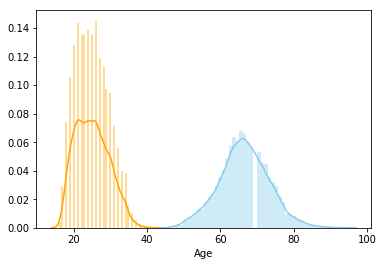

In [452]:
sns.distplot(fifa.Overall, label = 'Overall', color='skyblue')
sns.distplot(fifa.Age, label = 'Age', color ='orange')

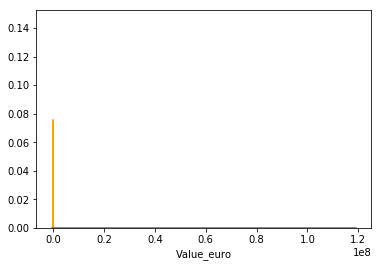

In [453]:
# Adding Value shows that data has a wide range
sns.distplot(fifa.Overall, label = 'Overall', color='skyblue')
sns.distplot(fifa.Age, label = 'Age', color ='orange')
sns.distplot(fifa.Value_euro)

In [28]:
# Create 2 dataframes: 1 for minmax scaling and 1 for z_score scaling
fifa_minmax = fifa.copy()
fifa_std = fifa.copy()

In [29]:
fifa_minmax.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
count,16134.000000,16134.000000,16134.000000,1.613400e+04,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,...,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000
mean,25.006942,66.456551,71.509917,2.520346e+06,10122.660221,1.115408,3.004711,2.532168,164.130904,54.186934,...,50.419177,54.815731,55.459712,52.130842,60.345915,51.305070,51.909570,49.626255,0.248234,0.751766
std,4.548132,6.796340,6.077058,5.709948e+06,22575.669099,0.396407,0.636872,0.617861,14.807510,14.134880,...,18.800294,14.679242,12.915172,12.514460,10.149171,17.226643,19.175164,19.174200,0.432001,0.432001
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,110.000000,11.000000,...,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,154.000000,44.000000,...,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000,0.000000,1.000000
50%,25.000000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,2.000000,163.000000,56.000000,...,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,0.000000,1.000000
75%,28.000000,71.000000,75.000000,2.200000e+06,9000.000000,1.000000,3.000000,3.000000,174.000000,65.000000,...,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000,0.000000,1.000000
max,41.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,243.000000,93.000000,...,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,1.000000,1.000000


In [30]:
fifa_std.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
count,16134.000000,16134.000000,16134.000000,1.613400e+04,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,...,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000
mean,25.006942,66.456551,71.509917,2.520346e+06,10122.660221,1.115408,3.004711,2.532168,164.130904,54.186934,...,50.419177,54.815731,55.459712,52.130842,60.345915,51.305070,51.909570,49.626255,0.248234,0.751766
std,4.548132,6.796340,6.077058,5.709948e+06,22575.669099,0.396407,0.636872,0.617861,14.807510,14.134880,...,18.800294,14.679242,12.915172,12.514460,10.149171,17.226643,19.175164,19.174200,0.432001,0.432001
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,110.000000,11.000000,...,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,154.000000,44.000000,...,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000,0.000000,1.000000
50%,25.000000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,2.000000,163.000000,56.000000,...,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,0.000000,1.000000
75%,28.000000,71.000000,75.000000,2.200000e+06,9000.000000,1.000000,3.000000,3.000000,174.000000,65.000000,...,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000,0.000000,1.000000
max,41.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,243.000000,93.000000,...,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,1.000000,1.000000


#### MinMax Scaling:

In [31]:
minmax_scaler = preprocessing.MinMaxScaler()

NameError: name 'preprocessing' is not defined

In [ ]:
# Scale all columns except binaries
fifa_minmax[['Age', 'Overall', 'Potential','Value_euro', 'Wage_euro', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'Weight_lbs', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']] = minmax_scaler.fit_transform(fifa_minmax[['Age', 'Overall', 'Potential','Value_euro', 'Wage_euro', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'Weight_lbs', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']])

In [32]:
fifa_minmax.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
count,16134.000000,16134.000000,16134.000000,1.613400e+04,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,...,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000
mean,25.006942,66.456551,71.509917,2.520346e+06,10122.660221,1.115408,3.004711,2.532168,164.130904,54.186934,...,50.419177,54.815731,55.459712,52.130842,60.345915,51.305070,51.909570,49.626255,0.248234,0.751766
std,4.548132,6.796340,6.077058,5.709948e+06,22575.669099,0.396407,0.636872,0.617861,14.807510,14.134880,...,18.800294,14.679242,12.915172,12.514460,10.149171,17.226643,19.175164,19.174200,0.432001,0.432001
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,110.000000,11.000000,...,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,154.000000,44.000000,...,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000,0.000000,1.000000
50%,25.000000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,2.000000,163.000000,56.000000,...,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,0.000000,1.000000
75%,28.000000,71.000000,75.000000,2.200000e+06,9000.000000,1.000000,3.000000,3.000000,174.000000,65.000000,...,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000,0.000000,1.000000
max,41.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,243.000000,93.000000,...,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,1.000000,1.000000


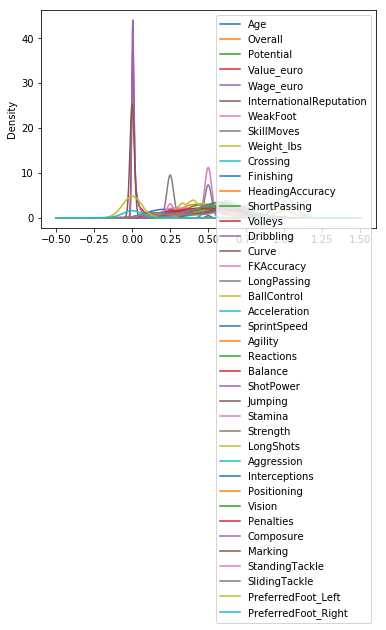

In [470]:
%matplotlib inline
fifa_minmax.plot(kind='density')

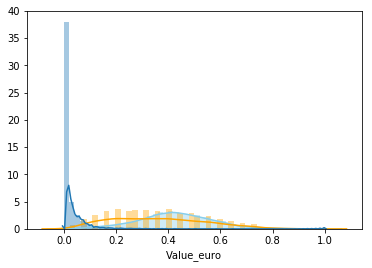

In [471]:
sns.distplot(fifa_minmax.Overall, label = 'Overall', color='skyblue')
sns.distplot(fifa_minmax.Age, label = 'Age', color ='orange')
sns.distplot(fifa_minmax.Value_euro)

#### Z-score Scaling:

In [33]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

In [34]:
# Scale all columns except binaries
fifa_std[['Age', 'Overall', 'Potential','Value_euro', 'Wage_euro', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'Weight_lbs', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']] = standard_scaler.fit_transform(fifa_std[['Age', 'Overall', 'Potential','Value_euro', 'Wage_euro', 'InternationalReputation',
       'WeakFoot', 'SkillMoves', 'Weight_lbs', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']])

C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
fifa_std.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right
count,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,...,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,16134.000000,16134.000000
mean,2.020757e-14,-2.180100e-14,1.096502e-15,-1.186447e-15,1.774462e-14,4.251809e-14,-2.613894e-14,8.620910e-14,-4.219260e-15,-1.953479e-14,...,-5.929402e-15,-1.296978e-14,-5.498253e-15,-7.553012e-16,-2.616415e-14,3.248424e-15,-2.177345e-14,-2.828502e-15,0.248234,0.751766
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,0.432001,0.432001
min,-1.980422e+00,-3.010030e+00,-3.868755e+00,-4.414092e-01,-4.484019e-01,-2.911456e-01,-3.147842e+00,-2.479872e+00,-3.655752e+00,-3.055440e+00,...,-2.149989e+00,-2.984969e+00,-3.365117e+00,-3.206857e+00,-3.778348e+00,-2.397818e+00,-2.185685e+00,-2.066709e+00,0.000000,0.000000
25%,-8.810356e-01,-6.557485e-01,-7.421448e-01,-3.801108e-01,-4.041051e-01,-2.911456e-01,-7.396611e-03,-8.613341e-01,-6.841946e-01,-7.207171e-01,...,-8.733739e-01,-6.005762e-01,-6.550416e-01,-8.095559e-01,-7.238171e-01,-8.304295e-01,-8.818748e-01,-9.192979e-01,0.000000,1.000000
50%,-1.526358e-03,-6.717815e-02,-8.391112e-02,-3.144339e-01,-3.155114e-01,-2.911456e-01,-7.396611e-03,-8.613341e-01,-7.637602e-02,1.282729e-01,...,2.968568e-01,1.488045e-01,1.192656e-01,-1.045557e-02,6.444909e-02,2.725473e-01,3.697830e-01,3.324229e-01,0.000000,1.000000
75%,6.581056e-01,6.685348e-01,5.743225e-01,-5.610480e-02,-4.973031e-02,-2.911456e-01,-7.396611e-03,7.572036e-01,6.665133e-01,7.650154e-01,...,7.755876e-01,6.938086e-01,7.387113e-01,7.886448e-01,7.541820e-01,7.950100e-01,7.870023e-01,8.018182e-01,0.000000,1.000000
max,3.516511e+00,4.052814e+00,3.865491e+00,2.031249e+01,2.457932e+01,9.799818e+00,3.133049e+00,3.994279e+00,5.326455e+00,2.745992e+00,...,2.211780e+00,2.737574e+00,2.984202e+00,3.185946e+00,3.513114e+00,2.478501e+00,2.142965e+00,2.157849e+00,1.000000,1.000000


In [475]:
fifa_std.isnull().sum()

Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                       0
Value_euro                 0
Wage_euro                  0
InternationalReputation    0
WeakFoot                   0
SkillMoves                 0
BodyType                   0
Position                   0
Height                     0
Weight_lbs                 0
Crossing                   0
Finishing                  0
HeadingAccuracy            0
ShortPassing               0
Volleys                    0
Dribbling                  0
Curve                      0
FKAccuracy                 0
LongPassing                0
BallControl                0
Acceleration               0
SprintSpeed                0
Agility                    0
Reactions                  0
Balance                    0
ShotPower                  0
Jumping                    0
Stamina                    0
Strength                   0
LongShots     

In [476]:
fifa_std.dtypes

Name                        object
Age                        float64
Nationality                 object
Overall                    float64
Potential                  float64
Club                        object
Value_euro                 float64
Wage_euro                  float64
InternationalReputation    float64
WeakFoot                   float64
SkillMoves                 float64
BodyType                    object
Position                    object
Height                      object
Weight_lbs                 float64
Crossing                   float64
Finishing                  float64
HeadingAccuracy            float64
ShortPassing               float64
Volleys                    float64
Dribbling                  float64
Curve                      float64
FKAccuracy                 float64
LongPassing                float64
BallControl                float64
Acceleration               float64
SprintSpeed                float64
Agility                    float64
Reactions           

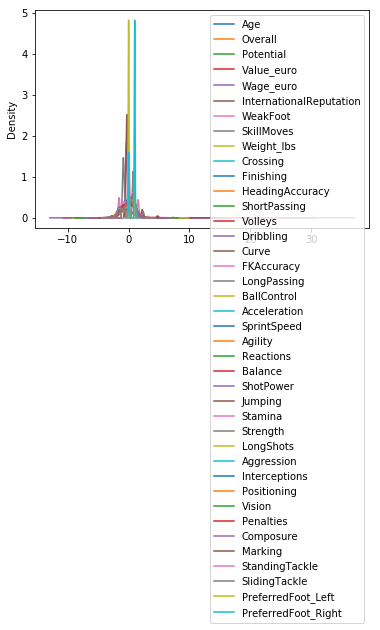

In [477]:
%matplotlib inline
fifa_std.plot(kind='density')

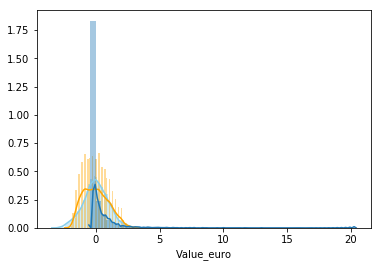

In [478]:
sns.distplot(fifa_std.Overall, label = 'Overall', color='skyblue')
sns.distplot(fifa_std.Age, label = 'Age', color ='orange')
sns.distplot(fifa_std.Value_euro)

#### Scaling Choice: Standard Scaler

### Examine Correlation

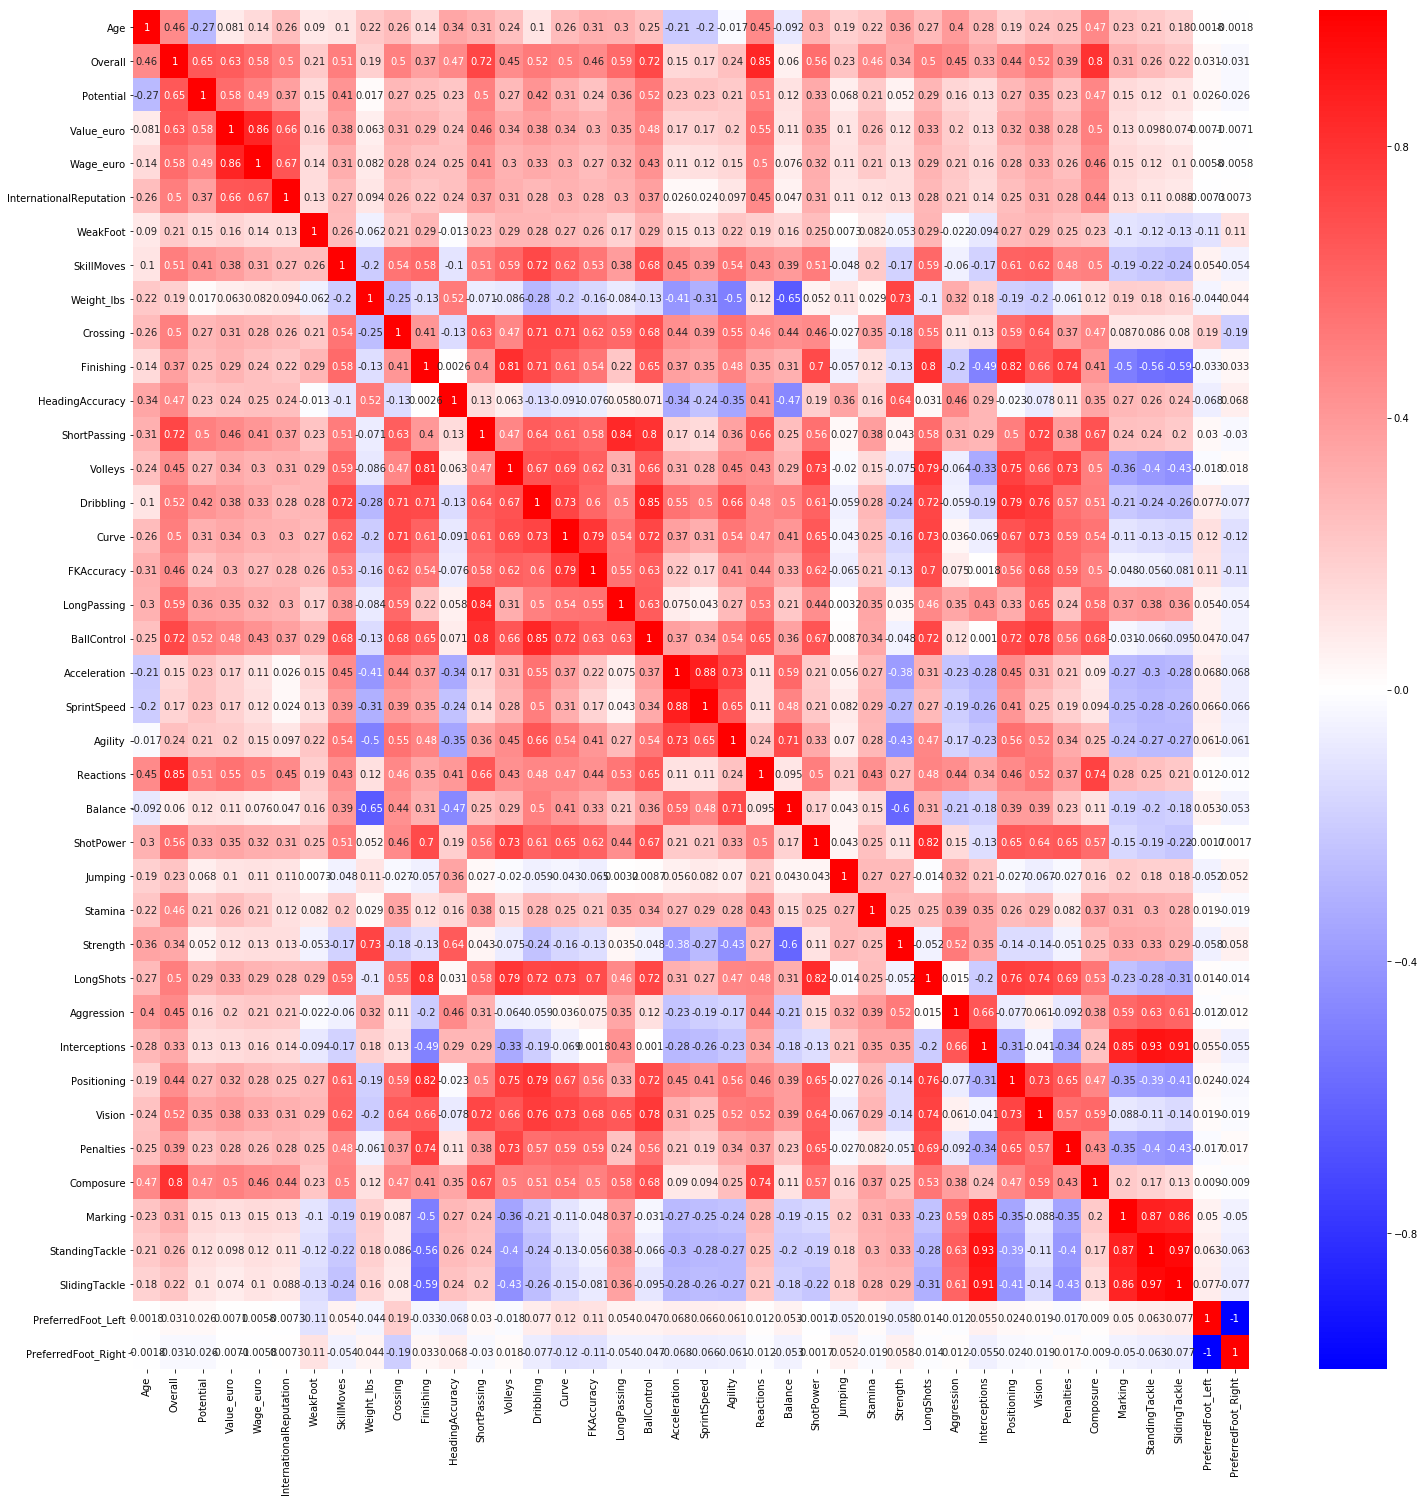

In [479]:
corr = fifa_std.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = "bwr", annot=True)

## Variables to be used in Multiple Linear Regression

#### Highest Correlation with Overall:
- Reactions (Corr of 0.85)
- Composure (Corr of 0.80)
- ShortPassing (Corr of 0.72)
    - BallControl also has a correlation of 0.72, but the correaltion between ShortPassing and BallControl is 0.80. We will want to keep this in mind when evaluating our model!

In [480]:
fifa_std[['Overall', 'Reactions', 'Composure', 'ShortPassing', 'BallControl']].corr()

,Overall,Reactions,Composure,ShortPassing,BallControl
Overall,1.000000,0.847722,0.801772,0.722615,0.717802
Reactions,0.847722,1.000000,0.739608,0.657652,0.646348
Composure,0.801772,0.739608,1.000000,0.672974,0.680167
ShortPassing,0.722615,0.657652,0.672974,1.000000,0.800648
BallControl,0.717802,0.646348,0.680167,0.800648,1.000000


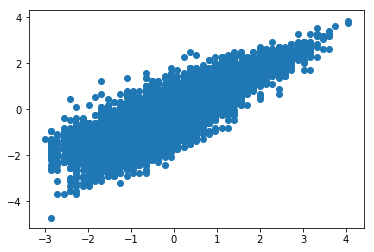

In [481]:
plt.scatter(fifa_std.Overall, fifa_std.Reactions)

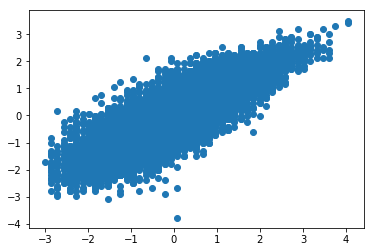

In [482]:
plt.scatter(fifa_std.Overall, fifa_std.Composure)

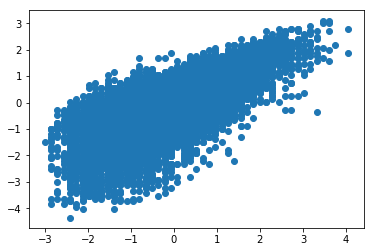

In [483]:
plt.scatter(fifa_std.Overall, fifa_std.ShortPassing)

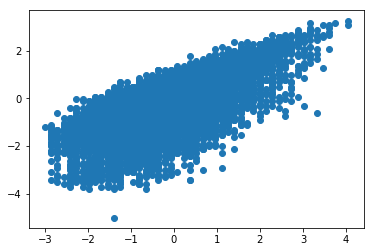

In [484]:
plt.scatter(fifa_std.Overall, fifa_std.BallControl)

### Outlier Dectection

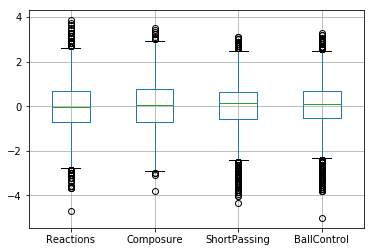

In [485]:
fifa_std.boxplot(column = ['Reactions', 'Composure', 'ShortPassing', 'BallControl'])

In [486]:
# Zscore
from scipy.stats import zscore
fifa_std["Reactions_z"] = zscore(fifa_std.Reactions)
fifa_std["Composure_z"] = zscore(fifa_std.Composure)
fifa_std["ShortPassing_z"] = zscore(fifa_std.ShortPassing)
fifa_std["BallControl_z"] = zscore(fifa_std.BallControl)

In [487]:
fifa_std.head()

,Name,Age,Nationality,Overall,Potential,Club,Value_euro,Wage_euro,InternationalReputation,WeakFoot,...,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right,Reactions_z,Composure_z,ShortPassing_z,BallControl_z
0,L. Messi,1.317738,Argentina,4.052814,3.700932,FC Barcelona,18.911382,24.579317,9.799818,1.562826,...,3.513114,-1.062635,-1.246942,-1.232228,1,0,3.741063,3.513114,2.792954,3.272600
1,Cristiano Ronaldo,1.757492,Portugal,4.052814,3.700932,Juventus,13.044246,17.491822,9.799818,1.562826,...,3.414580,-1.352892,-1.090484,-1.388693,0,1,3.855126,3.414580,1.874556,3.073102
2,Neymar Jr,0.218351,Brazil,3.758529,3.536374,Paris Saint-Germain,20.312489,12.397684,9.799818,3.133049,...,3.316047,-1.410944,-1.455551,-0.867143,0,1,3.626999,3.316047,2.180688,3.172851
4,K. De Bruyne,0.438228,Belgium,3.611386,3.371815,Manchester City,17.422706,15.276979,7.277077,3.133049,...,2.724847,0.969164,0.317631,0.071648,0,1,3.284809,2.724847,2.997042,2.773856
5,E. Hazard,0.438228,Belgium,3.611386,3.207257,Chelsea,15.846461,14.612527,7.277077,1.562826,...,3.020447,-1.004584,-1.299094,-1.440848,0,1,3.170746,3.020447,2.690910,3.073102


#### Count Outliers:

In [488]:
len(fifa_std[abs(fifa_std.Reactions_z) > 2.5])

187

In [489]:
len(fifa_std[abs(fifa_std.Composure_z) > 2.5])

93

In [490]:
len(fifa_std[abs(fifa_std.ShortPassing_z) > 2.5])

357

In [491]:
len(fifa_std[abs(fifa_std.BallControl_z) > 2.5])

377

In [492]:
fifa_std.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right,Reactions_z,Composure_z,ShortPassing_z,BallControl_z
count,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,...,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,16134.000000,16134.000000,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04
mean,2.020757e-14,-2.180100e-14,1.096502e-15,-1.186447e-15,1.774462e-14,4.251809e-14,-2.613894e-14,8.620910e-14,-4.219260e-15,-1.953479e-14,...,-2.616415e-14,3.248424e-15,-2.177345e-14,-2.828502e-15,0.248234,0.751766,-5.731268e-14,-2.616415e-14,4.178165e-15,2.767231e-15
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,0.432001,0.432001,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.980422e+00,-3.010030e+00,-3.868755e+00,-4.414092e-01,-4.484019e-01,-2.911456e-01,-3.147842e+00,-2.479872e+00,-3.655752e+00,-3.055440e+00,...,-3.778348e+00,-2.397818e+00,-2.185685e+00,-2.066709e+00,0.000000,0.000000,-4.699621e+00,-3.778348e+00,-4.350144e+00,-5.006549e+00
25%,-8.810356e-01,-6.557485e-01,-7.421448e-01,-3.801108e-01,-4.041051e-01,-2.911456e-01,-7.396611e-03,-8.613341e-01,-6.841946e-01,-7.207171e-01,...,-7.238171e-01,-8.304295e-01,-8.818748e-01,-9.192979e-01,0.000000,1.000000,-7.074059e-01,-7.238171e-01,-5.745065e-01,-5.178541e-01
50%,-1.526358e-03,-6.717815e-02,-8.391112e-02,-3.144339e-01,-3.155114e-01,-2.911456e-01,-7.396611e-03,-8.613341e-01,-7.637602e-02,1.282729e-01,...,6.444909e-02,2.725473e-01,3.697830e-01,3.324229e-01,0.000000,1.000000,-2.302617e-02,6.444909e-02,1.398033e-01,8.063862e-02
75%,6.581056e-01,6.685348e-01,5.743225e-01,-5.610480e-02,-4.973031e-02,-2.911456e-01,-7.396611e-03,7.572036e-01,6.665133e-01,7.650154e-01,...,7.541820e-01,7.950100e-01,7.870023e-01,8.018182e-01,0.000000,1.000000,6.613536e-01,7.541820e-01,6.500246e-01,6.791313e-01
max,3.516511e+00,4.052814e+00,3.865491e+00,2.031249e+01,2.457932e+01,9.799818e+00,3.133049e+00,3.994279e+00,5.326455e+00,2.745992e+00,...,3.513114e+00,2.478501e+00,2.142965e+00,2.157849e+00,1.000000,1.000000,3.855126e+00,3.513114e+00,3.099087e+00,3.272600e+00


There are 187 outliers for Reactions, 93 outliers for Composure, 357 for Short Passing, and 377 for Ball Control using a z_score threshold of 2.5.

#### Remove Outliers

In [493]:
# Remove outliers
fifa_std_no_out = (fifa_std[abs(fifa_std.BallControl_z) < 2.5])

In [494]:
fifa_std_no_out = (fifa_std_no_out[abs(fifa_std.ShortPassing_z) < 2.5])

C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [495]:
fifa_std_no_out = (fifa_std_no_out[abs(fifa_std.Reactions_z) < 2.5])

C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [496]:
fifa_std_no_out = (fifa_std_no_out[abs(fifa_std.Composure_z) < 2.5])

C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [497]:
# 738 outliers removed
len(fifa_std) - len(fifa_std_no_out)

738

In [498]:
fifa_std_no_out.describe()

,Age,Overall,Potential,Value_euro,Wage_euro,InternationalReputation,WeakFoot,SkillMoves,Weight_lbs,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,PreferredFoot_Left,PreferredFoot_Right,Reactions_z,Composure_z,ShortPassing_z,BallControl_z
count,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,...,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000,15396.000000
mean,0.025051,0.035667,0.011718,-0.036016,-0.033187,-0.028647,0.014021,0.019316,-0.005226,0.042520,...,0.039073,0.000355,-0.002170,-0.002215,0.249935,0.750065,0.040451,0.039073,0.074054,0.072430
std,0.991061,0.939609,0.972780,0.743231,0.750908,0.899523,0.997050,0.992000,0.996827,0.964771,...,0.946360,1.003071,1.002709,1.003558,0.432989,0.432989,0.933146,0.946360,0.877450,0.875233
min,-1.980422,-3.010030,-3.868755,-0.441409,-0.448402,-0.291146,-3.147842,-0.861334,-3.655752,-3.055440,...,-2.497416,-2.397818,-2.185685,-2.066709,0.000000,0.000000,-2.418355,-2.497416,-2.411303,-2.413081
25%,-0.881036,-0.508606,-0.742145,-0.375732,-0.359808,-0.291146,-0.007397,-0.861334,-0.684195,-0.649968,...,-0.625284,-0.830430,-0.881875,-0.919298,0.000000,1.000000,-0.593343,-0.625284,-0.472462,-0.418105
50%,-0.001526,0.079964,-0.083911,-0.310055,-0.315511,-0.291146,-0.007397,-0.861334,-0.076376,0.199022,...,0.064449,0.272547,0.369783,0.332423,0.000000,1.000000,0.091037,0.064449,0.139803,0.080639
75%,0.658106,0.668535,0.574323,-0.038591,-0.005433,-0.291146,-0.007397,0.757204,0.666513,0.765015,...,0.754182,0.795010,0.787002,0.801818,0.000000,1.000000,0.661354,0.754182,0.650025,0.679131
max,3.516511,3.317101,3.371815,10.242032,12.176200,7.277077,3.133049,3.994279,5.326455,2.675243,...,2.429248,2.420450,2.142965,2.105694,1.000000,1.000000,2.486366,2.429248,2.486821,2.474609


### Testing for Normality

#### Visuals:

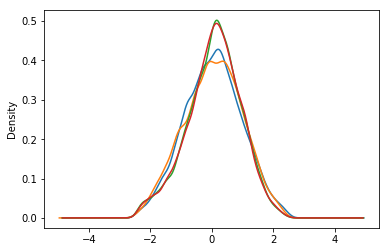

In [499]:
fifa_std_no_out.Reactions.plot(kind = 'density')
fifa_std_no_out.Composure.plot(kind = 'density')
fifa_std_no_out.ShortPassing.plot(kind = 'density')
fifa_std_no_out.BallControl.plot(kind = 'density')

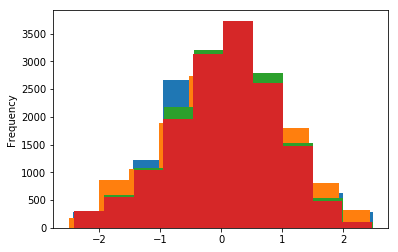

In [500]:
fifa_std_no_out.Reactions.plot(kind = 'hist')
fifa_std_no_out.Composure.plot(kind = 'hist')
fifa_std_no_out.ShortPassing.plot(kind = 'hist')
fifa_std_no_out.BallControl.plot(kind = 'hist')

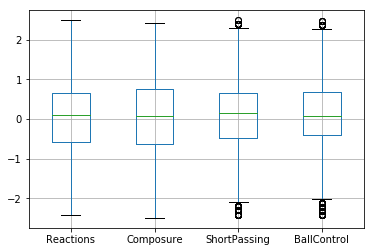

In [501]:
fifa_std_no_out.boxplot(column = ['Reactions', 'Composure', 'ShortPassing', 'BallControl'])

#### Stats:

##### Shapiro-Wilk

In [502]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(fifa_std_no_out.Reactions)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9964395761489868, Pvalue= 8.34835083447652e-19
Sample does not look Gaussian (reject H0)


C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [503]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(fifa_std_no_out.Composure)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.99417644739151, Pvalue= 2.508905647524163e-24
Sample does not look Gaussian (reject H0)


C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [504]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(fifa_std_no_out.ShortPassing)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.991524338722229, Pvalue= 4.72703074260009e-29
Sample does not look Gaussian (reject H0)


C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [505]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(fifa_std_no_out.BallControl)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9919188022613525, Pvalue= 1.9917522113553154e-28
Sample does not look Gaussian (reject H0)


C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### K Squared

In [506]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(fifa_std_no_out.Reactions)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 99.07084501908012, Pvalue= 3.0693000422276683e-22
Sample does not look Gaussian (reject H0)


In [507]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(fifa_std_no_out.Composure)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 249.09591350777376, Pvalue= 8.119132883991767e-55
Sample does not look Gaussian (reject H0)


In [508]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(fifa_std_no_out.ShortPassing)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 211.63786518644196, Pvalue= 1.1051506765087287e-46
Sample does not look Gaussian (reject H0)


In [509]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(fifa_std_no_out.BallControl)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 198.79525719899158, Pvalue= 6.794513798718172e-44
Sample does not look Gaussian (reject H0)


##### Anderson Darling

In [510]:
from scipy.stats import anderson

# anderson test
result = anderson(fifa_std_no_out.Reactions)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 12.153256267025426
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [511]:
# anderson test
result = anderson(fifa_std_no_out.Composure)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 20.614734809179936
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [512]:
# anderson test
result = anderson(fifa_std_no_out.ShortPassing)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 34.12737698029014
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [513]:
# anderson test
result = anderson(fifa_std_no_out.BallControl)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 33.614892770154256
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


Independent variables do not appear to be normal according to the statistical tests. However, according to the density plots and histograms, the data appears normal enough to work with. Furthermore, the independent variables do not need to be normally distributed to perform Multiple Linear Regression successfully. MLR does not assume a normal distribution. 

## Multiple Linear Regression

### GOAL: Predict "Overall" player rating using Multiple Linear Regression with following variables: Reactions, Composure, BallControl, ShortPasssing

#### Model Creation

In [514]:
# Pull out features
fifa_x = fifa_std_no_out[['Reactions', 'Composure', 'BallControl', 'ShortPassing']]
fifa_x.head()

,Reactions,Composure,BallControl,ShortPassing
24,2.258240,2.330714,-0.617603,-0.370418
27,2.486366,2.330714,1.477122,2.282733
39,2.258240,2.035114,1.676619,1.772511
42,2.258240,2.133648,1.377373,1.874556
44,2.030113,1.739515,-0.318357,0.343892


In [515]:
fifa_y = pd.DataFrame(fifa_std_no_out, columns=['Overall'])
fifa_y.head()

,Overall
24,3.317101
27,3.169959
39,3.169959
42,3.022816
44,3.022816


In [516]:
# Split into Training and Test sets
from sklearn.model_selection import train_test_split
fifa_x_train, fifa_x_test, fifa_y_train, fifa_y_test = train_test_split(fifa_x, fifa_y, 
                                                   test_size=0.2, 
                                                   random_state=1)

In [517]:
fifa_x_train.count()

Reactions       12316
Composure       12316
BallControl     12316
ShortPassing    12316
dtype: int64

In [518]:
fifa_x_test.count()

Reactions       3080
Composure       3080
BallControl     3080
ShortPassing    3080
dtype: int64

In [519]:
# Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=8)

# train
fit = model.fit(fifa_x_train, fifa_y_train) # here we're just loading the entire dataframe instead of a subset

# make predictions
preds = model.predict(fifa_x_test) #checking if our x test values can predict our known Overall player ratings.

In [520]:
model.intercept_

array([-0.014823])

In [521]:
model.coef_

array([[0.48025258, 0.26852633, 0.14652443, 0.12916347]])

In [522]:
preds[0:5]

array([[-0.29974891],
       [-0.31206231],
       [ 0.76078989],
       [-1.02303789],
       [-0.98747405]])

#### Visualize Results / Plot Residuals:

Text(0, 0.5, 'Predictions')

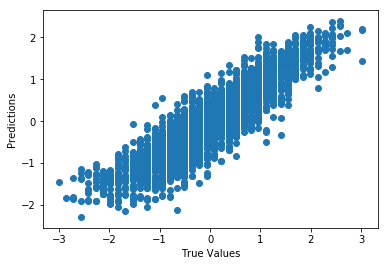

In [523]:
# plot predicted vs actual
plt.scatter(fifa_y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

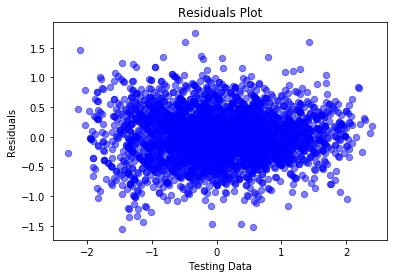

In [524]:
residuals = fifa_y_test - preds
plt.scatter(model.predict(fifa_x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

#### Examine Error:

In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(fifa_x_train)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

C:\Users\cbryan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           1.009643
Reactions       2.326722
Composure       2.421236
BallControl     2.726548
ShortPassing    2.707708
dtype: float64

BallControl appears to have the highest correlation with our other variables

In [526]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fifa_y_test, preds)

0.3326842255100042

In [527]:
# RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(fifa_y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse)
rmse

0.4231978595539851

In [528]:
# Range of Overall
fifa_std_no_out.Overall.max() - fifa_std_no_out.Overall.min()

6.327131118691067

Given the Range is 6.327 and our rmse is 0.423, the error is relatively low.

In [529]:
# R-squared
from sklearn.metrics import r2_score
r2_score(fifa_y_test, preds)

0.8019700658264157

80.2% of the variation is explained by our model. I would consider this to be quite high considering only 4 predictors were used.

## Process Summary & Conclusion

In conclusion, this dataset proved to be a great candidate for multiple linear regression when attempting to predict overall field player rating. By using the 4 variables most highly correlated with overall rating, I was able to create a model that explained 80.2% of the variation. The root mean square error was 0.423, which is quite low considering the scaled range of Overall player ratings was 6.327.

Before creating my multiple linear regression model, I needed to clean my dataset. Firstly, I dropped any irrelevant columns, such as Club Logo, Work Rate, Jersey Number, etc. Secondly, I located missing data in my dataset. There were 241 players without a club assigned, which most likely means they are currently “free agents”. There were also 60 players without a position. To handle this, I set all the null values in the “Club” and “Position” columns to “unknown”. Furthermore, there were 48 players that had an overall rating, but were missing the underlying predictor values such as reactions, composure, and short passing. Since these players only accounted for 0.2% of the total data, I decided to simply drop them from the dataset. I also needed to clean up the weight, value, and wage columns, as these columns all had units attached to the actual numeric value. After stripping the symbols and converting the units as appropriate, I altered the data type of these columns from objects to numerics. Next, I one hot encoded the “PreferredFoot” column so I could potentially utilize this data in my analysis. Lastly, I filtered out all the goalies in my dataset. Reason being, goalies have their own individual rating system which uses variables such as “GKDiving”, “GKKicking”, etc. I wanted my model to predict actual field player ratings, and I did not want the goalies negatively affecting my model. After doing so, I was able to begin my exploratory data analysis.

I started my exploratory data analysis by understanding the range, mean, etc. of my columns using the describe function. I also used the seaborn package to plot my data by position and preferred foot to further understand the makeup of my data. Using the groupby method, I grouped my data by country and position. I discovered insights such as players who play right wing have the highest average sprint speed, and Portugal/Argentina have the most talented players in the world. I then scaled my data using both z-score scaling and max-min scaling, before ultimately deciding to use z-score scaling. After examining the distribution, I created a heatmap to detect the columns that were most highly correlated with overall rating. These columns were: Reactions (corr of 0.85); Composure (corr of 0.80); ShortPassing (corr of 0.72); and BallControl (corr of 0.72). I decided to focus on these four columns for my multiple linear regression. 

The next step of my exploratory data analysis involved detecting and removing outliers for my four predictor columns. I did so by filtering out all rows that had a z-score with an absolute value greater than 2.5 for any of my four columns. This process resulted in 738 rows of data being removed, or 4.6% of the standardized data. After removing the outliers, I re-examined the distribution of my 4 independent variables using a density plot, histogram, and boxplot. The data appeared to be normally distributed. However, none of these 4 independent variables passed any of the three statistical tests I performed (Shapiro-Wilk, K Squared, and Anderson Darling). For example, all of our independent variables' p-values for the Shapiro-Wilk test were incredibly small with high W-statistics. This means we reject the null hypothesis that the distribution is normal. Nonetheless, I concluded the data can still be utilized for multiple linear regression since it does not assume a normal distribution. 

Now, it was time to create my model. I split my data into two data frames: one data frame containing all the independent variables (Reactions, Composure, Ball Control, and Short Passing), and one data frame containing my dependent variable (Overall rating). I then split my data further into testing data and training data, with 80% of my data serving as training data, and 20% serving as test data. Lastly, I fit my model using the training data and predicted the overall field player ratings using the testing data frame containing my independent variables. 

As shown in the scatter plot of predicted values vs. actual values, the model performed quite well. Furthermore, the vast majority of residuals were roughly centered around 0, although there were definitely some outliers which had a residual with an absolute value greater than 1.5. To improve my model, I could locate these data points and potentially remove them from my data.

Regarding future analysis, I want to test various combinations of independent variables in order to improve the fit of my model further, while simultaneously reducing error. I only used 4 columns in my model, and many other columns could potentially be added. There are also many other predictions I could perform, such as predicting a players position, predicting whether or not a player is a goalie, and predicting the value of a player.
